# Week 9 Probability HW

While the Belize dataset is not normally distributed, act as if it is for the purposes of the homework. 

In [2]:
# Importing dependencies. 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
# Putting the airbnb csv into a dataframe. 
belize_listings = "belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings)

In [3]:
belize_df.head()
#Showing the first five rows of the df to get column names and get a feel for the data. 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


### 1. Why is assuming normal data an important consideration when answering questions about probability?
The central limit theorem says that as long as your sample size is n=30 or above then you can assume a normal distribution. The law of large numbers says that the larger the sample size (<1000) the closer you are to the normal bell shape curve distribution. So when answering questions about probability, as long as there is enough data points, we can use the probability statistics without questioning our data. 

### 2. Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data. 
### How do you choose your bin size?

The bin size for the "reviews_per_month" column was just one bin per data point since the max number was 6. The max number of bins for the "number_of_reviews" column was 316 so I chose a wider bin steps, spacing them about 60 apart. I could have done smaller bin sizes and had more bins, however, with most of the number of reviews being skewed so low, it didn't make much of a difference in the look of the histogram. 

In [4]:
# First I am getting all the stats at a glance so I can decide what bin size to choose. 
belize_df['reviews_per_month'].describe()

count    1810.000000
mean        0.538088
std         0.662154
min         0.010000
25%         0.110000
50%         0.275000
75%         0.700000
max         5.920000
Name: reviews_per_month, dtype: float64

In [5]:
belize_df['number_of_reviews'].describe()

count    2796.000000
mean       14.453505
std        30.327768
min         0.000000
25%         0.000000
50%         2.000000
75%        13.000000
max       316.000000
Name: number_of_reviews, dtype: float64

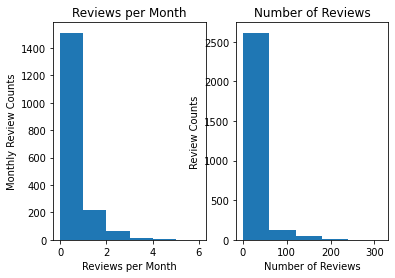

In [6]:
fig, ax = plt.subplots(1, 2)

# Creating a subplot for the "review_per_month" column, selecting the bins, and customizing the labels. 
bins_list = [0, 1, 2, 3, 4, 5, 6]
ax[0].hist(belize_df['reviews_per_month'], bins = bins_list)
ax[0].set(xlabel='Reviews per Month', ylabel='Monthly Review Counts',
       title='Reviews per Month')

# Creating a subplot for the "number_of_reviews" column, selecting the bins, and customizing the labels.
bins_list2 = [0, 60, 120, 180, 240, 316]
ax[1].hist(belize_df['number_of_reviews'], bins = bins_list2)
ax[1].set(xlabel='Number of Reviews', ylabel='Review Counts',
       title='Number of Reviews')

plt.show()

### 3. Create a box and whisker plot for availability_365. What does this show you?

Box plots are useful when displaying skewed data. The line that cuts through the box represents the median. The box itself is the interquartile range. The whiskers are the minimum and maximum. The circles represent outliers. We can see here that most of the data points are in the upper range (meaning available almost all year round).

In [7]:
#In order to create a whisker plot for this column I need to trim the outliers. 

#Find the IQR: 
from scipy.stats import iqr
iqr = iqr(belize_df['availability_365'])

#Next, find the q1 outliers:
q1 = np.quantile(belize_df['availability_365'], 0.25)

#Then the q3 outliers:
q3 = np.quantile(belize_df['availability_365'], 0.75)

#Calculate the upper and lower thresholds:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(lower)
print(upper)

6.5
578.5


In [8]:
#Creating a new DF with the outliers removed.
new_belize_df = belize_df[(belize_df['availability_365'] < upper) & (belize_df['availability_365'] > lower)]

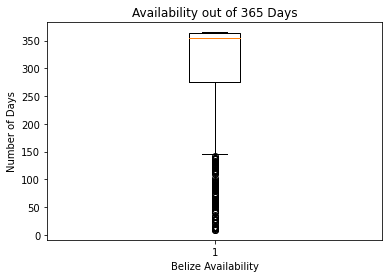

In [9]:
fig, ax = plt.subplots()

ax.boxplot(new_belize_df['availability_365'])

ax.set_title('Availability out of 365 Days')
ax.set_xlabel('Belize Availability')
ax.set_ylabel('Number of Days')

plt.show()

### 4. What is the probability that the price for an Airbnb is under 50 dollars?
2.5%
### What do you notice about these records? Hint: look at the other columns. 
It looks as though if you want the cheaper Airbnb rate, then you will have to share a room with someone or your minimum allowed nights goes up significantly.
### What distribution does this data most closely fit?
This data set is similar to a normal discrete distribution. 

In [10]:
#Finding the value counts on the 'price' column in order to calculate the probability of each price. 
counts = belize_df['price'].value_counts()

probs = counts / len(belize_df['price'])
print(probs)

252     0.023963
151     0.023963
161     0.022175
171     0.021459
121     0.021102
          ...   
67      0.000358
2736    0.000358
231     0.000358
439     0.000358
118     0.000358
Name: price, Length: 541, dtype: float64


In [11]:
#Creating a probability distribution. 
size_dist = counts / belize_df.shape[0]

#Resetting the index and renaming the columns. 
size_dist = size_dist.reset_index()
size_dist.columns = ['price', 'prob']

#Finding the expected value. 
expected_value = np.sum(size_dist['price'] * size_dist['prob'])

#Subsetting the data to only include prices under $50. 
less_than_50 = size_dist[size_dist['price'] <= 50]

#Finding the probablity that a price is less than $50. 
less_than_50 = less_than_50['prob'].sum()
print(less_than_50)


0.025035765379113013


In [59]:
# Looking at the DF to spot the difference in this subset of data. 
belize_50 = belize_df[belize_df['price'] <= 50]
belize_50.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
134,4005831,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51482,-88.22233,Private room,20,1,2,3/1/2020,0.03,10,365
148,4304743,"DORMITORY Bed #1 of 6, on Maya Ruin",2084006,Lower Dover,Cayo,Cayo,17.21379,-88.94974,Shared room,36,1,1,2/10/2020,0.08,4,365
172,4936432,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51426,-88.22121,Shared room,20,1,16,2/4/2020,0.24,10,365
189,5509363,"Yaxche Jungle Camp, Dormitory",6960726,Yaxche Jungle Camp,Cayo,Cayo,17.15125,-88.66244,Shared room,24,1,30,2/25/2020,0.42,2,365
196,5717367,Comfortable and Ecological Camping,29641332,Minerva,Cayo,Cayo,17.05410,-89.11378,Entire home/apt,30,1,6,10/16/2017,0.09,1,365


In [12]:
# Getting the stats on this column in order to look at a histogram of the data. 
belize_df['price'].describe()

count     2796.000000
mean       357.102289
std        563.124825
min         20.000000
25%        135.000000
50%        220.000000
75%        394.250000
max      11788.000000
Name: price, dtype: float64

<AxesSubplot:>

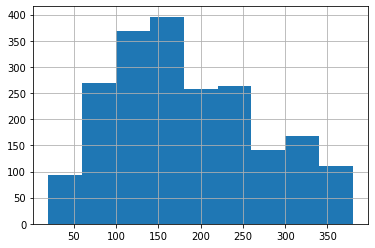

In [13]:
#Creating a histogram of the data to see the distribution. 
belize_df['price'].hist(bins=[20, 60, 100, 140, 180, 220, 260, 300, 340, 380])

### 5. Calculate the sample variance and standard deviation for all the numerical columns in the same output. 

### Why sample variance and not population variance?
We must use sample variance unless the data set has the entire population. 
### What is your takeaway for each metric?
price, host listings, and availability have a higher standard deviation which makes me think that there isn't a big enough sample size for this data. Minimum nights, number of reviews, and reviews per month all have lower std and var which tells me that the data is much less distributed for these metrics. 
### What are the scales of measurement for each of these values? 
price - nominal, minimum nights- ratio, number of reviews- ratio, calculated listings count- ratio, availability- ratio.

In [16]:
belize_df.agg({'price' : [np.std, np.var], 'minimum_nights' : [np.std, np.var], 'number_of_reviews' : [np.std, np.var], 'reviews_per_month' : [np.std, np.var], 'calculated_host_listings_count' : [np.std, np.var], 'availability_365' : [np.std, np.var]})

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
std,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632
var,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157


### 6. What percent of Airbnb listings in Belize are available 360 days a year or more?
~40%
### 360 days or less?
~60%
### What distribution does this data most closely fit?
This is a negatively skewed distribution. 

In [23]:
#Finding the mean and std of the availability column. 
belize_df['availability_365'].describe()

count    2796.000000
mean      280.315451
std       120.617632
min         0.000000
25%       221.000000
50%       349.000000
75%       364.000000
max       365.000000
Name: availability_365, dtype: float64

<AxesSubplot:>

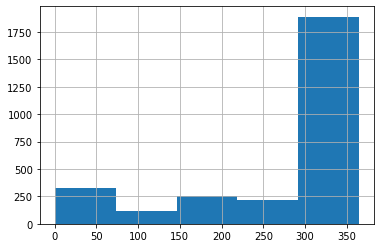

In [24]:
#Creating a histogram of the data to see the distribution. 
belize_df['availability_365'].hist(bins=5)

In [42]:
#finding the total value counts
counts = belize_df['availability_365'].value_counts()
print(counts.sum())

#finding the total amount of airbnbs that are available 360 days or greater. 
counts_360 = belize_df['availability_365'][belize_df['availability_365'] >= 360].value_counts()
print(counts_360.sum())

#Calculating the probability of availability greater than 360 days. 
probs = counts_360 / len(belize_df['availability_365'])
print(probs.sum())

#Finding the count of less than 360 days
less_than_360 = counts.sum() - counts_360.sum()
print(less_than_360)

#calculating the probability of availability less than 360 days. 
probs_less_than_360 = less_than_360 / len(belize_df['availability_365'])
print(probs_less_than_360)

2796
1105
0.39520743919885554
1691
0.6047925608011445


### 7. What minimum night count are 75% of Airnbnb listing in Belize greater than?

In [19]:
# Finding the mean and std
belize_df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64

In [22]:
from scipy.stats import norm
#calculating the probability for a given normal distribution value
min_night_count = norm.ppf((1-0.75), 2.263948, 5.669843)
print(min_night_count)

-1.5603029887210025


### 8. Explain The Monty Hall problem in your notebook in markdown in under 250 words.

Monty Hall was a gameshow host that would offer contestants the choice of one of three curtains which one of those curtains contains a prize. One curtain has the prize and the other two have something that you don't want like a goat. Once you have chosen the curtain, Monty would give the contestant a peek at another curtain that would have the unwanted item in it. So then the contestant is given the choice of sticking with their original choice or choosing the other curtain. The main question behind the Monty Hall problem is: in order to win, do I switch or not switch? To answer that question you must simply find the probability of choosing the right curtain. Since there is two wrong curtains and one right curtain, you have a much higher probabiity of choosing the wrong curtain initially. Your best chance of winning is to always switch your original curtain choice. 

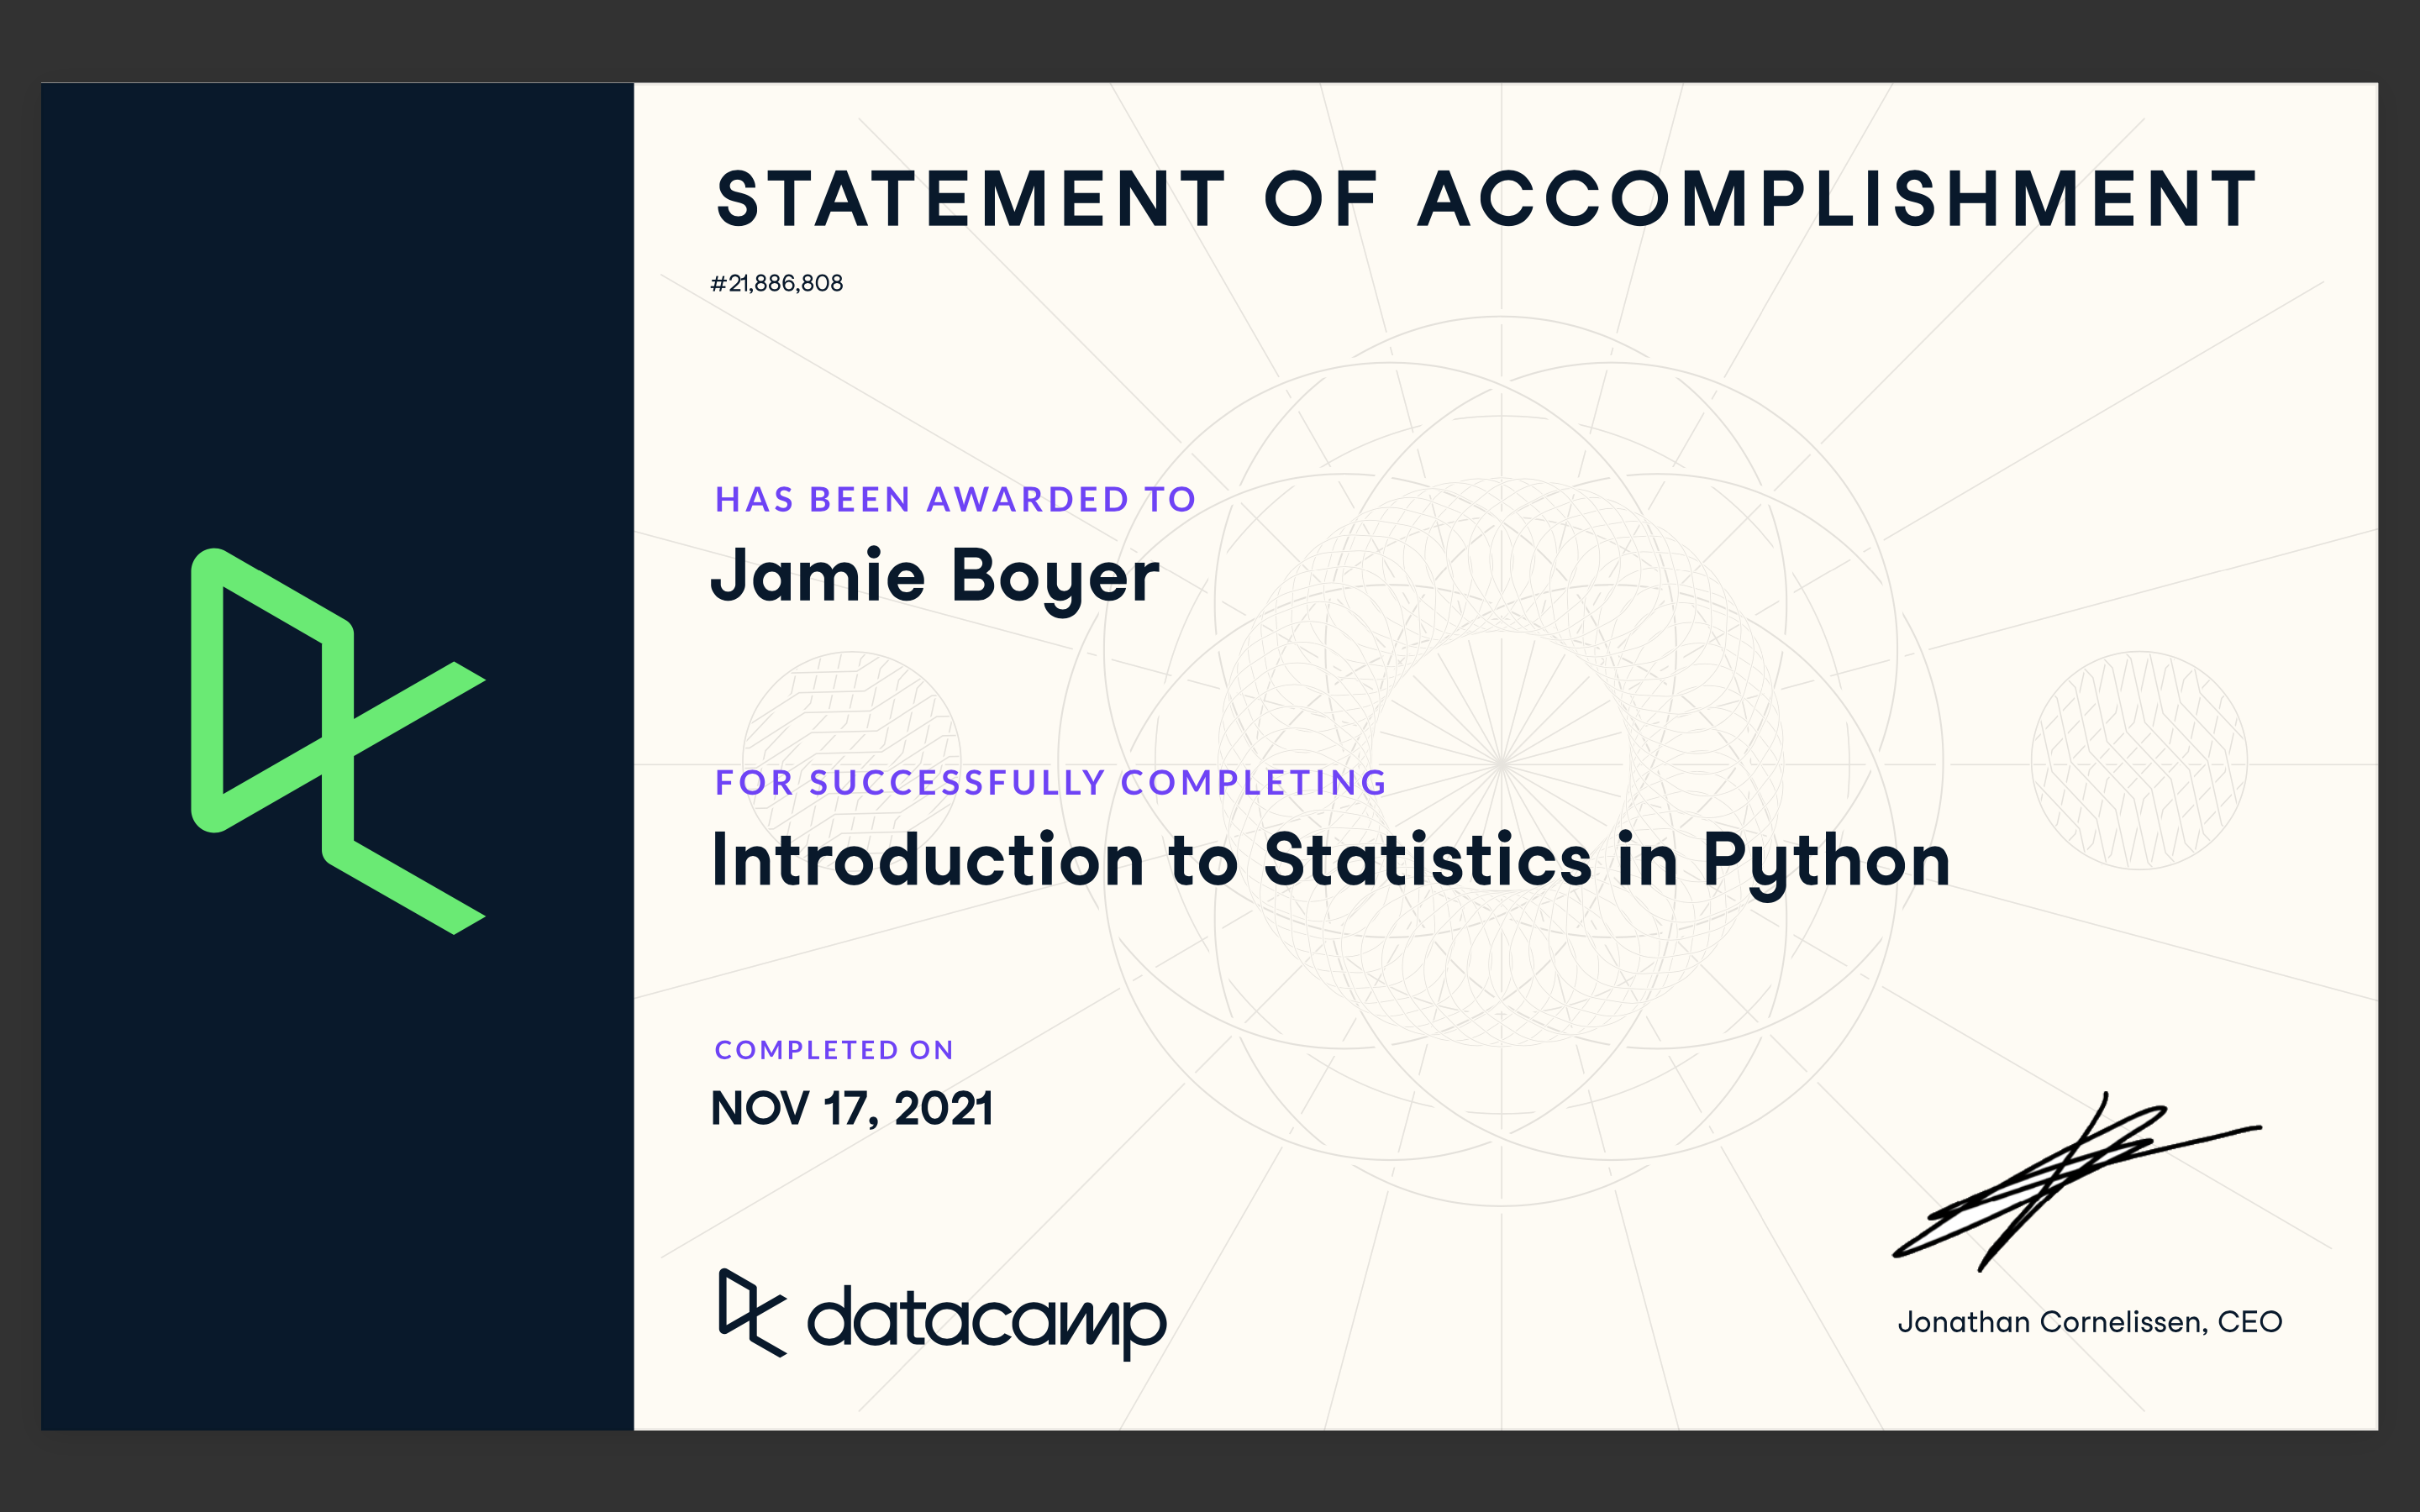